<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color:  #c1531f   ">Competition Description</li>

><div class="alert alert-info" role="alert">
><ul style="font-family:cursive;font-size:20px;color:  #2025bd">
><li > The dataset is used for this competition is synthetic, but based on a real dataset and generated using a CTGAN. The original dataset deals with predicting whether a claim will be made on an insurance policy. Although the features are anonymized, they have properties relating to real-world features.</li>
> <li> For ideas on how to improve your score, check out the <a style="color:  black" href="https://www.kaggle.com/learn/intro-to-machine-learning" target="_blank"> <u>Intro to Machine Learning</u></a> and <a style="color:  black" href="https://www.kaggle.com/learn/intermediate-machine-learning" target="_blank">   <u>Intermediate Machine Learning</u></a> courses on Kaggle Learn.</li>
></ul>
></div>

<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color:  #c1531f   ">About the Notebook</li>

><div class="alert alert-info" role="alert">
><ul style="font-family:cursive;font-size:20px;color:  #2025bd">
><li > This notebook Sole purpose is Exploratory Data Analysis (EDA).</li>
> <li> You can find Missing value imputation, distribution of variables and some decorations around them.</li>    
> <li> This is very general EDA but can set a benchmark for other masterpieces which some of may create in future.</li>
> <li> I didn't divide the data into train and test as the sole purpose of this was to carry out EDA.</li>
></ul>
></div>


<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color: #c1531f  ">Importing Required Libraries</li>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# To impute missing Values
from sklearn.impute import SimpleImputer


<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color: #c1531f  ">Setting up some parameters for Visualization, outputs etc</li>


In [2]:
# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

# for Interactive Shells
from IPython.display import display

<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color: #c1531f  ">Loading the data</li>

In [3]:
df = pd.read_csv('../input/tabular-playground-series-sep-2021/train.csv')
df_test = pd.read_csv('../input/tabular-playground-series-sep-2021/test.csv')
submission_sample = pd.read_csv('../input/tabular-playground-series-sep-2021/sample_solution.csv')

<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color: #c1531f  ">Looking at the first 5 rows of the data</li>

In [4]:
df.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,...,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,1
1,1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,...,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,0
2,2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,...,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,1
3,3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,...,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486,1
4,4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,...,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,1


<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color: #c1531f  ">Shape of the data</li>

In [5]:
df.shape

(957919, 120)


<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color: #c1531f  ">Checking Null Values</li>

In [6]:
# Total Missing Values
df.isnull().sum().sum()

1820782

In [7]:
#printing only 70 columns with highest number of Null values
df.isnull().sum().sort_values(ascending = False).to_frame().head(70).rename({0:'Counts'}, axis = 1).T.style.background_gradient('crest')

,f31,f46,f24,f83,f68,f103,f95,f12,f116,f64,f57,f74,f76,f50,f60,f4,f115,f39,f69,f88,f106,f73,f109,f32,f100,f47,f86,f6,f62,f15,f91,f25,f7,f111,f33,f92,f3,f67,f82,f45,f90,f71,f19,f56,f13,f44,f53,f93,f75,f43,f20,f58,f21,f78,f85,f48,f89,f16,f27,f114,f38,f99,f51,f61,f17,f11,f54,f55,f42,f29
Counts,15678,15633,15630,15627,15619,15600,15599,15593,15589,15578,15573,15570,15569,15562,15560,15560,15559,15559,15552,15548,15544,15537,15529,15529,15526,15523,15523,15521,15518,15509,15507,15506,15504,15499,15492,15492,15491,15486,15485,15483,15482,15482,15474,15467,15464,15463,15462,15457,15456,15455,15455,15455,15454,15449,15449,15446,15445,15444,15444,15438,15434,15434,15432,15431,15427,15425,15425,15422,15416,15415


<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color: #c1531f  ">Percentage of Null Values =(sum of null values / total number of rows) * 100</li>


,f31,f12,f24,f95,f83,f103,f76,f74,f46,f116,f57,f68,f64,f71,f82,f32,f33,f86,f39,f73,f67,f69,f45,f90,f50,f47,f60,f88,f91,f100,f3,f4,f115,f6,f7,f111,f109,f106,f15,f19,f25,f92,f62,f75,f93,f63,f61,f78,f65,f66,f105,f94,f89,f114,f79,f85,f84,f107,f99,f112,f59,f29,f43,f5,f11,f13,f16,f17,f20,f21
%age,1.640000,1.630000,1.630000,1.630000,1.630000,1.630000,1.630000,1.630000,1.630000,1.630000,1.630000,1.630000,1.630000,1.620000,1.620000,1.620000,1.620000,1.620000,1.620000,1.620000,1.620000,1.620000,1.620000,1.620000,1.620000,1.620000,1.620000,1.620000,1.620000,1.620000,1.620000,1.620000,1.620000,1.620000,1.620000,1.620000,1.620000,1.620000,1.620000,1.620000,1.620000,1.620000,1.620000,1.610000,1.610000,1.610000,1.610000,1.610000,1.610000,1.610000,1.610000,1.610000,1.610000,1.610000,1.610000,1.610000,1.610000,1.610000,1.610000,1.610000,1.610000,1.610000,1.610000,1.610000,1.610000,1.610000,1.610000,1.610000,1.610000,1.610000


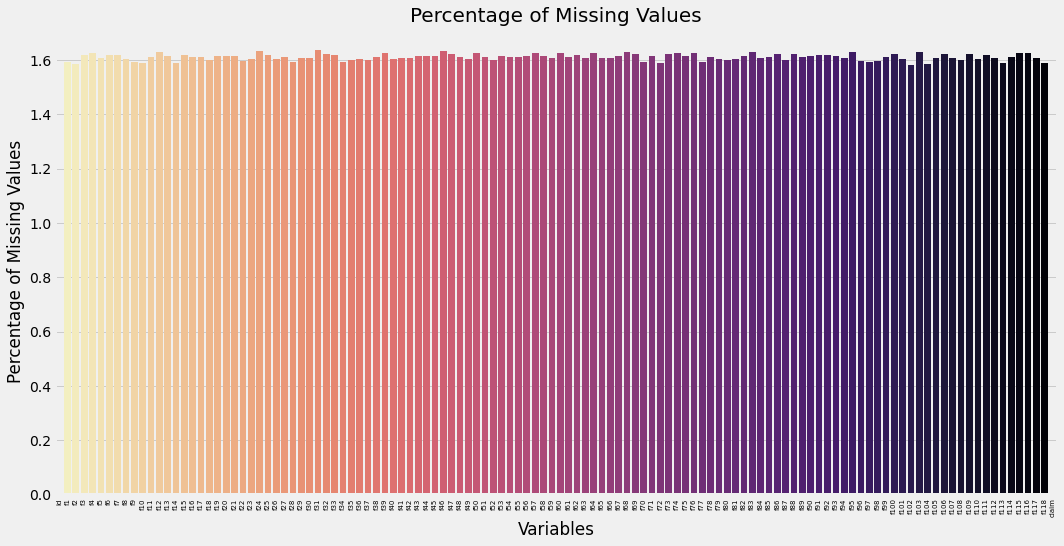

In [8]:
#printing only 70 columns with highest percentage of Null values
display(round((df.isnull().sum() / (len(df.index)) * 100) , 2).sort_values(ascending = False).head(70).to_frame().rename({0:'%age'}, axis = 1).T.style.background_gradient('magma_r'))
print()
missing = (df.isnull().sum() / (len(df.index)) * 100).to_frame().reset_index().rename({0:'%age'}, axis = 1)
ax = sns.barplot(missing['index'],missing['%age'], palette  = 'magma_r')
plt.title("Percentage of Missing Values", fontsize = 20)
plt.xticks(fontsize =7, rotation = 90)
plt.xlabel("Variables")
plt.ylabel("Percentage of Missing Values")
plt.show();

<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color:  #c1531f   ">Observations:</li>

><div class="alert alert-info" role="alert">
><ul style="font-family:cursive;font-size:20px;color:  #2025bd">
    ><li > Overall we have <b>1.60%-1.64% </b> missing values and <b>variable f31</b> has the highest missing values percentage</li>
    > <li> Total missing values:<b> 1820782 </b></li>
    > <li> We can use <b>SimpleImputer</b> from sklearn to impute missing values. I'm selecting <b>Median</b> as the strategy, to take non parametric approach.</li>
></ul>
></div>

<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color: #c1531f  "> Impute Missing Values</li>

><div class="alert alert-info" role="alert">
><ul style="font-family:cursive;font-size:20px;color:  #2025bd">
><li >As discussed we will use <b>SimpleImputer</b> from sklearn to impute missing values, with median as the strategy</li>
></ul>
></div>

In [9]:
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df))

# Imputation removed column names hence, getting back the names
df_imputed.columns = df.columns

# Checking the final dataset for missing values again.
df_imputed.isnull().sum().sort_values(ascending = False).to_frame().reset_index().rename({0:'Count'}, axis =1).head(70).T.style.background_gradient('magma_r')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
index,id,f1,f88,f87,f86,f85,f84,f83,f82,f81,f80,f79,f78,f77,f76,f75,f74,f73,f72,f71,f70,f69,f68,f67,f66,f65,f64,f63,f62,f89,f90,f91,f106,f118,f117,f116,f115,f114,f113,f112,f111,f110,f109,f108,f107,f105,f92,f104,f103,f102,f101,f100,f99,f98,f97,f96,f95,f94,f93,f61,f60,f59,f15,f27,f26,f25,f24,f23,f22,f21
Count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color: #c1531f  "> Describing the Data</li>


In [10]:
df_imputed.describe().style.background_gradient(cmap='bone_r')

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
count,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000
mean,478959.000000,0.090200,0.346648,4023.637907,0.200171,0.305238,-0.076459,1618.015571,375760.028958,1785331364061520.250000,5255.898619,0.736758,1829342676.060572,0.248216,6.972547,0.019250,439.066355,6.890959,4.483521,22.407005,201.220559,60391.347624,2.269871,87.316698,0.353477,414.270391,3338610884839.124023,1239081939667.615479,2245653.103275,0.325024,7.865567,0.398500,133102.056634,354888.463825,-0.000005,27532837858273768.000000,183.248240,405.287683,1.765282,1971.689844,0.354996,441.340641,0.355326,6.943460,29.621097,0.013370,4.277854,0.031069,6.374454,-0.430106,0.300300,56.022852,2672.261933,12.043260,137.313602,0.250916,0.410708,0.000012,-0.327796,3.048561,0.549612,0.272027,2452341747.731565,36.681402,0.211731,48278.337459,84.236183,606.257904,28.874620,1.211951,0.411756,1.543273,481.332312,787695956745404.625000,1048245410304.004028,0.371978,6.874797,10590.779395,10474.624976,1.543205,0.193657,3.230288,104984069633.784302,150.963471,6045829.335892,633.046904,32401202228.219307,26.481887,206.825986,3789.525413,6.725434,0.367448,4807.307664,131.840461,0.824751,13.058281,3804.268012,0.999970,14044337171564.250000,1.678626,0.425229,20.120716,319897.260481,541.290926,3809.929659,0.177700,0.160239,0.014091,1657871435.949197,0.397983,-19.841540,2.067857,23.528798,1.735052,62449.115695,1.208361,42289072025928544.000000,3947.444102,0.557904,0.498492
std,276527.540591,0.043216,0.145187,6373.458942,0.210934,0.144198,2.106862,1266.102926,342825.799922,2322265263129345.500000,10002.190177,1.484524,2111369860.391894,0.100399,6.571987,0.101058,627.819395,1.701907,3.868494,14.495131,279.455679,89289.509284,0.888830,37.068267,1.632898,312.313521,5619361048589.526367,1633693950595.474121,2287183.131605,0.431508,5.893431,0.776219,202283.873399,459513.477062,0.001522,34325175227312108.000000,696.33

<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color: #c1531f  "> Checking Correlations</li>

><div class="alert alert-info" role="alert">
><ul style="font-family:cursive;font-size:20px;color:  #2025bd">
><li >Since we have only numerical (Float) type variables we can directly check correlation and obtain some more insights.</li>
></ul>
></div>

In [11]:
df_imputed.corr()[['claim']].T.style.background_gradient('copper_r')

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
claim,-0.000224,-0.007844,-0.005977,0.008486,0.001893,-0.002869,0.008960,0.007107,0.012257,-0.001137,0.001462,0.006673,-0.000968,0.007514,0.004288,-0.007881,-0.000055,-0.002705,-0.000747,0.000463,-0.007376,-0.017850,-0.002915,0.007078,-0.002897,-0.007049,-0.002624,-0.000954,0.003438,-0.001073,0.006670,0.016374,-0.014788,-0.004287,-0.021356,0.009617,0.010031,-0.003226,-0.010762,0.004891,-0.006441,-0.005222,-0.006647,0.000090,-0.006820,-0.020292,-0.007813,-0.008853,0.010815,-0.003160,0.008928,-0.005117,-0.014327,0.001063,-0.008634,0.003976,0.001510,-0.017838,0.002851,-0.000188,-0.002322,0.004520,0.006967,-0.004592,-0.000066,0.001029,0.001322,-0.003103,-0.005567,-0.005715,-0.003243,0.009767,-0.000227,-0.009202,-0.003657,-0.005605,-0.001244,0.003461,0.001386,0.009174,0.000761,-0.000306,-0.004344,-0.000376,-0.004623,0.000596,0.005081,0.003368,-0.002293,-0.006823,0.004906,-0.000990,0.002526,-0.004669,0.000701,0.012194,0.005052,0.007035,-0.000611,0.000733,0.001974,-0.002473,0.005467,-0.005267,0.001302,0.001936,0.006821,-0.010349,0.004218,-0.006799,-0.003383,0.002636,-0.009447,0.005532,-0.000477,-0.002632,-0.005784,-0.003886,0.002970,1.000000


<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color: #c1531f  "> Observations</li>

><div class="alert alert-info" role="alert">
><ul style="font-family:cursive;font-size:20px;color:  #2025bd">
><li>Independent Variables have very low correlation with target variable (Claim)</li>
></ul>
></div>

<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color: #c1531f  ">Outlier Detection</li>

<AxesSubplot:>

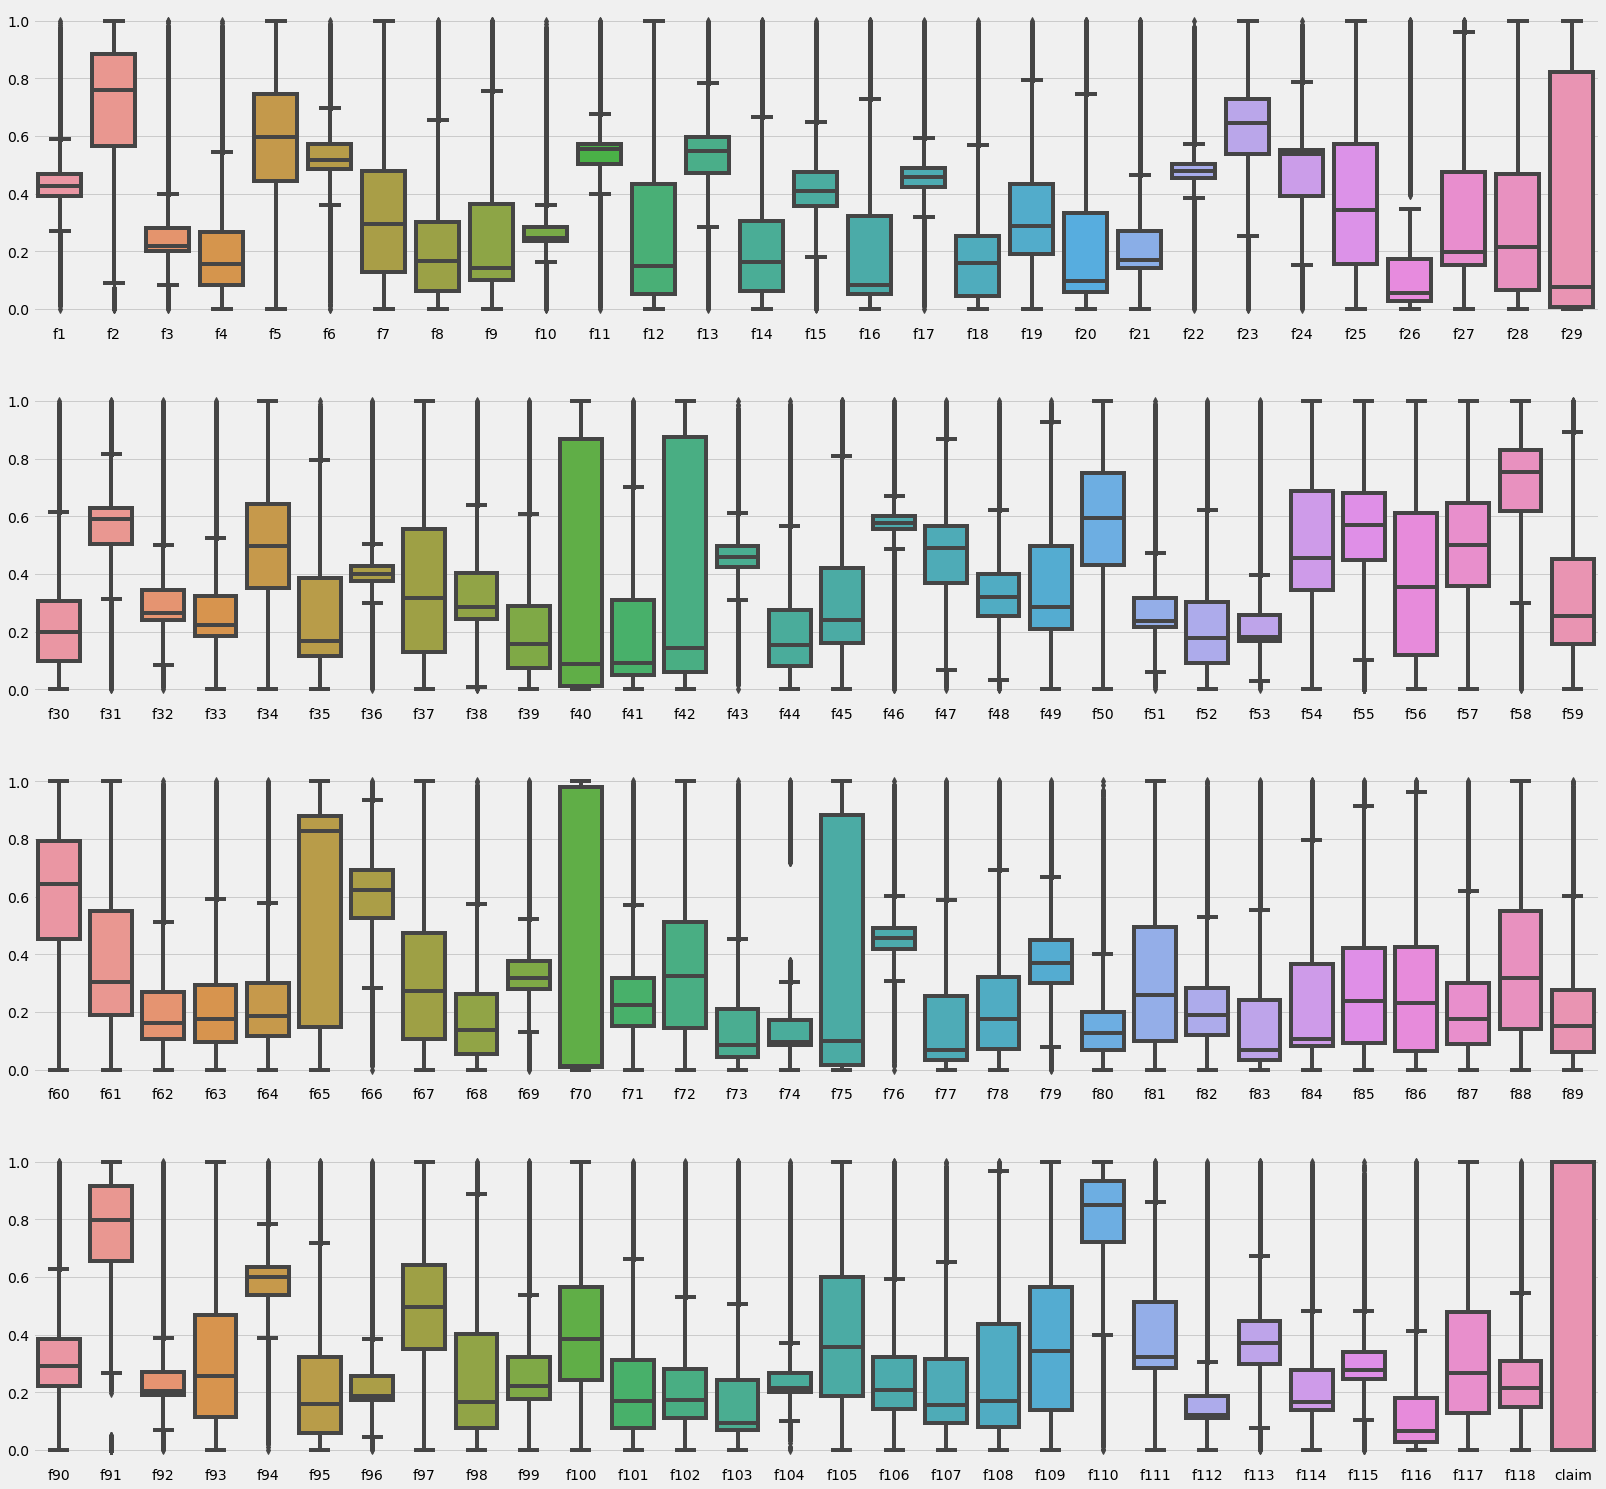

In [12]:
# Reference: https://www.kaggle.com/suharkov/sep-2021-playground-eda-no-model-for-now
df_plot = ((df_imputed - df_imputed.min())/(df_imputed.max() - df_imputed.min()))
fig, ax = plt.subplots(4, 1, figsize = (25,25))
sns.boxplot(data = df_plot.iloc[:, 1:30], ax = ax[0])
sns.boxplot(data = df_plot.iloc[:, 30:60], ax = ax[1])
sns.boxplot(data = df_plot.iloc[:, 60:90], ax = ax[2])
sns.boxplot(data = df_plot.iloc[:, 90:120], ax = ax[3])

<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color: #c1531f  "> Observations:</li>

><div class="alert alert-info" role="alert">
><ul style="font-family:cursive;font-size:20px;color:  #2025bd">
><li >There are many Outliers and must be treated before finalizing the model.</li>
><li >Some ways could be to use Flooring, Capping methods etc.</li>
></ul>
></div>

<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color: #c1531f  ">Distribution of Variables</li>

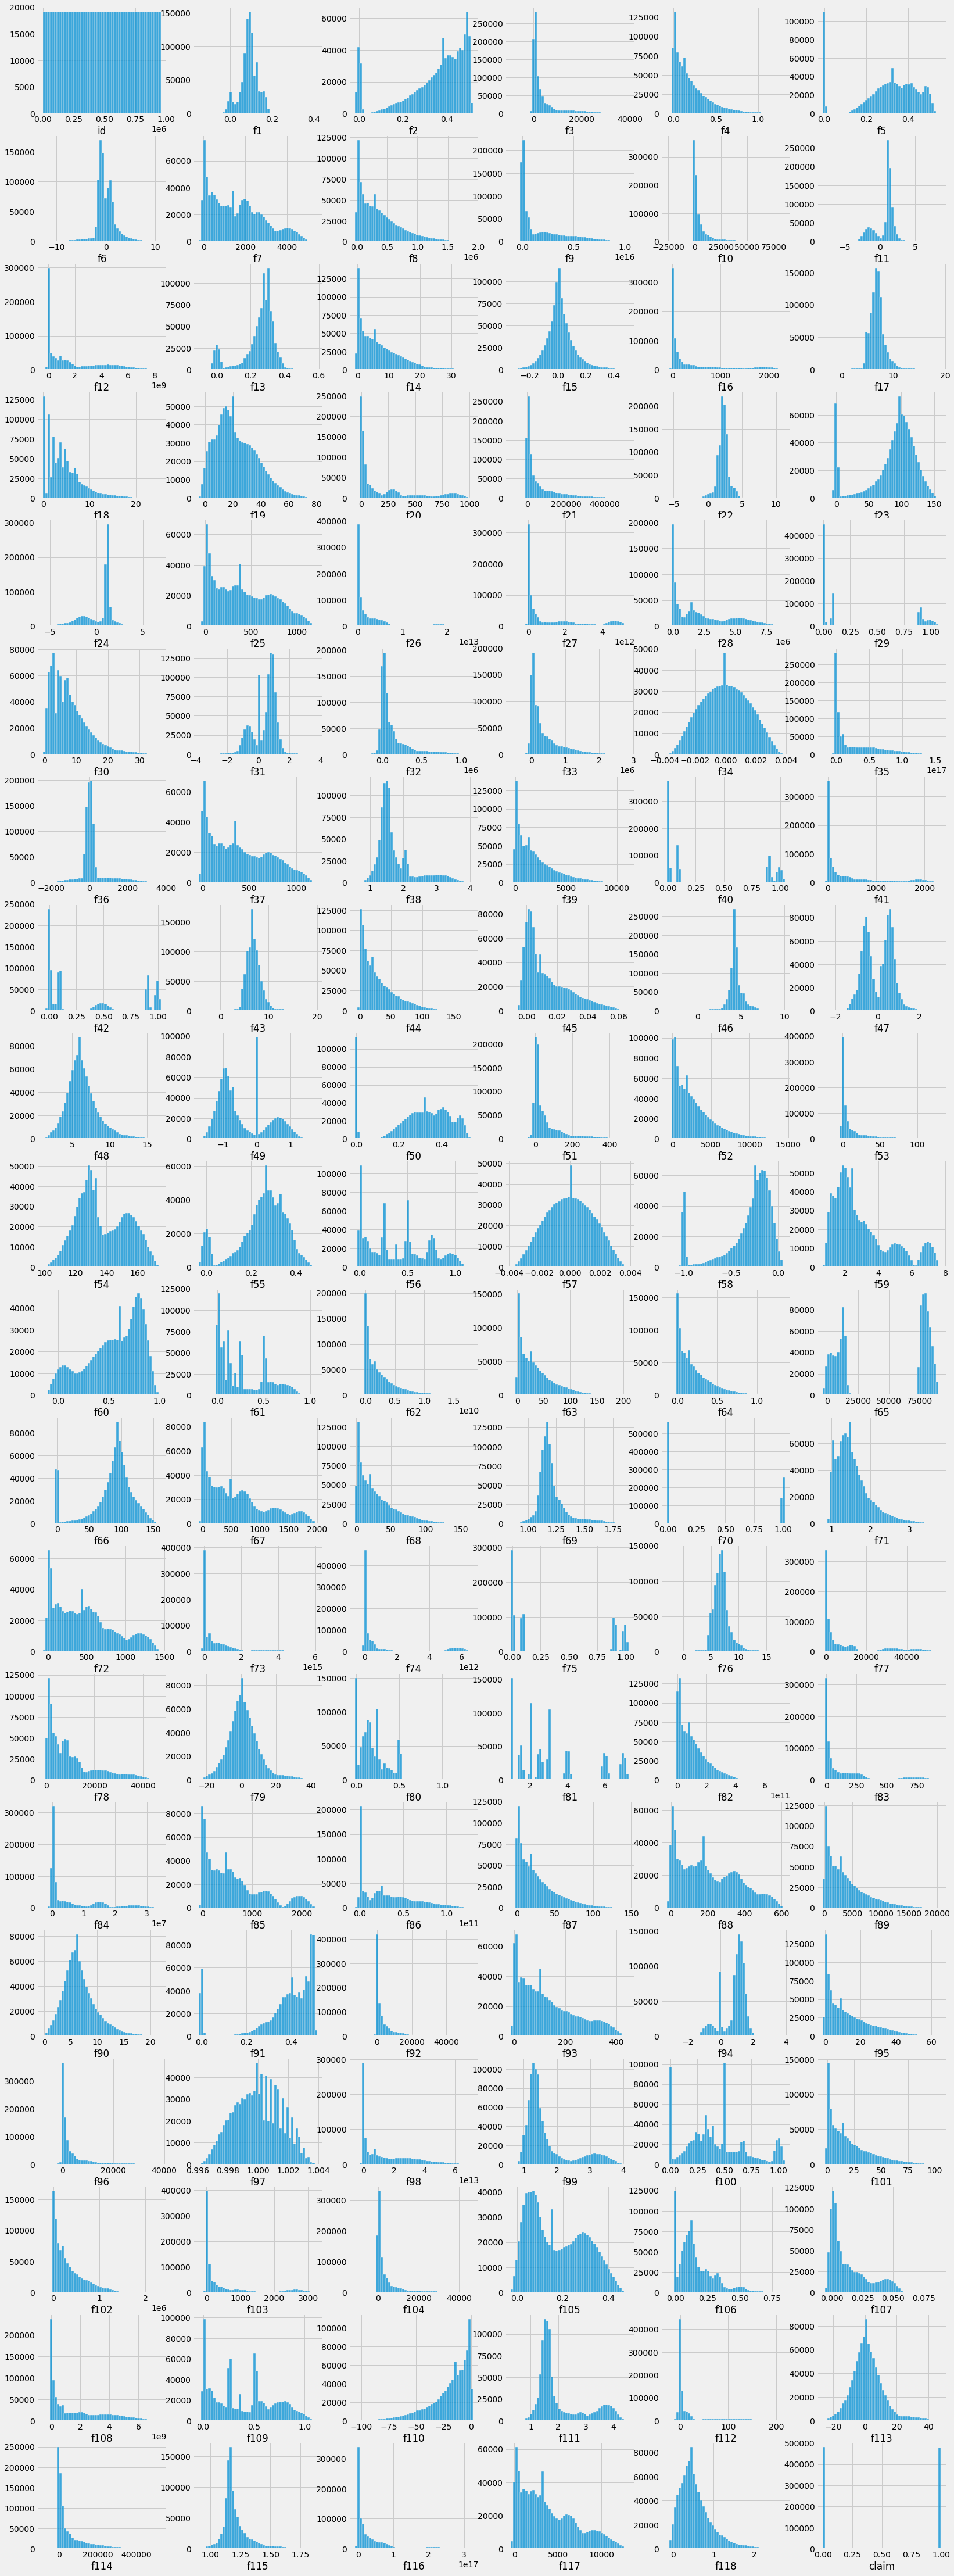

In [13]:
#Reference: https://www.kaggle.com/suharkov/sep-2021-playground-eda-no-model-for-now 
nrows = 20
ncols = 6
i = 0
fig, ax = plt.subplots(nrows, ncols, figsize = (25,75))
for row in range(nrows):
    for col in range(ncols):
        sns.histplot(data = df_imputed.iloc[:, i], bins = 50, ax = ax[row, col], palette  = 'bone_r').set(ylabel = '')
        i += 1



<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color: #c1531f  "> Observations</li>

><div class="alert alert-info" role="alert">
><ul style="font-family:cursive;font-size:20px;color:  #2025bd">
><li >Data has various kind of Distributions and is skewed in various cases.</li>
><li >Some of them are even Gaussian, Binomial (target)</li>
><li >Some ways to get around could be <b> Log Transformation, Outlier Treatment, Various Feature Engineering techniques </b> etc.</li>
></ul>
></div>

<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color: #c1531f  "> Finally:</li>

><div class="alert alert-info" role="alert">
><ul style="font-family:cursive;font-size:20px;color:  #2025bd">
><li >Even I am beginner looking forward to learn something new. So let me know how can i improve this.</li>
><li >If you like the notebook, kindly upvote so it is visible to most of us.</li>
></ul>
></div>

<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color: #c1531f  "> Thank you !!</li>